# RobustScaler

## DataSet synthetic, made with Excel

x = 50 → 298

z_rand = randbetween(1;100)

z_prep = randbetween(1;2)

z = if(z_rand > 70; if(z_prep = 1; +100; -100); 0)

y = x + z

## About RobustScaler from sklearn-site

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

## Data plot

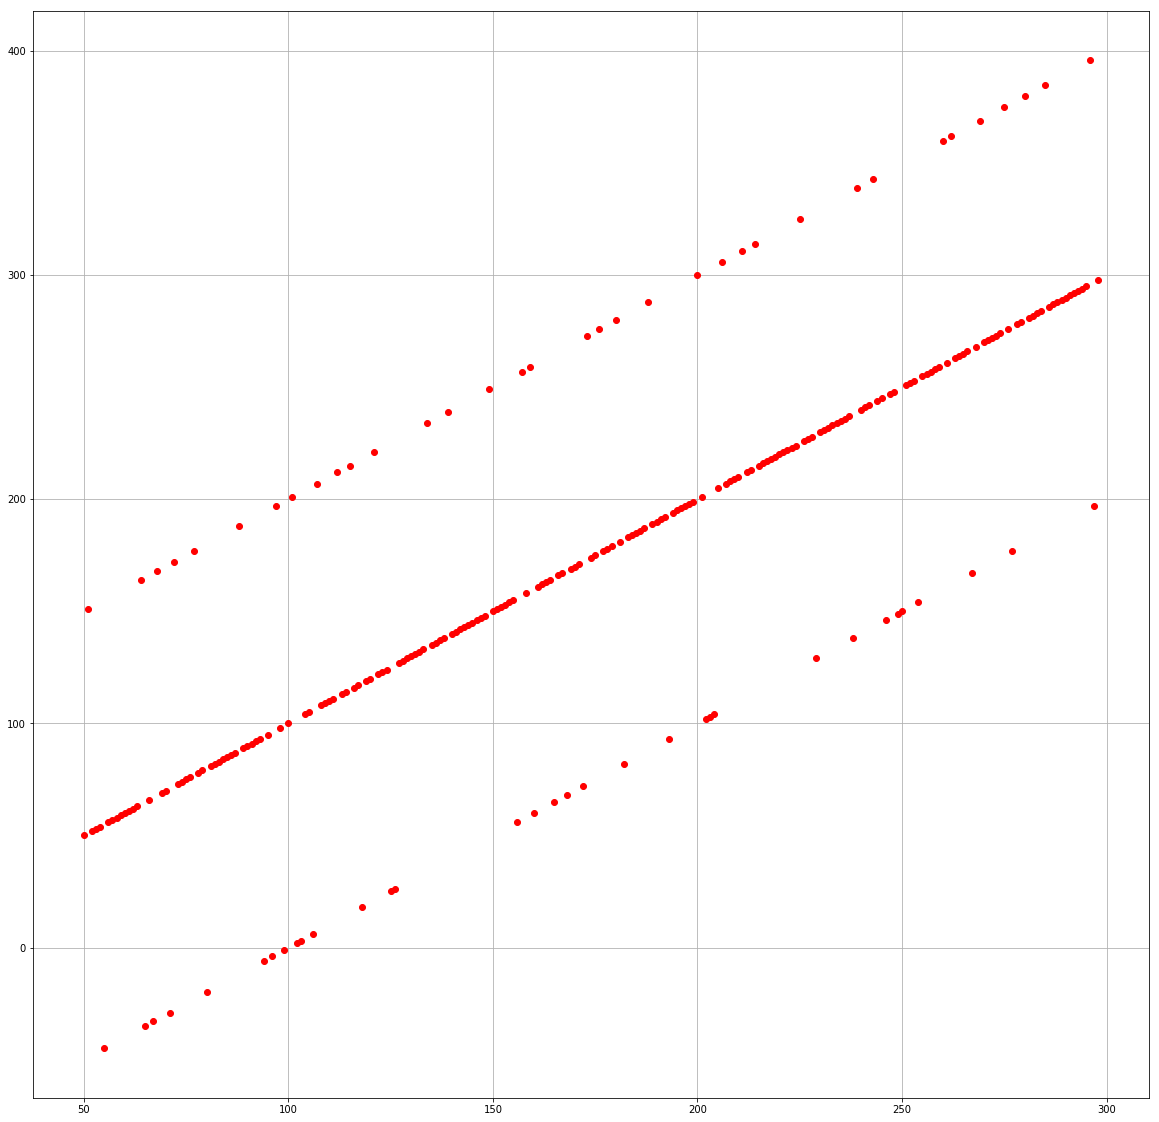

In [54]:
data = pd.read_csv('synda.csv', sep=';')

plt.figure(figsize=(20,20))
plt.plot(data['x'], data['y'], 'ro')
plt.grid()

## Data describe

In [10]:
data.describe()

,x,y
count,249.000000,249.000000
mean,174.000000,174.803213
std,72.024301,90.061345
min,50.000000,-45.000000
25%,112.000000,108.000000
50%,174.000000,177.000000
75%,236.000000,242.000000
max,298.000000,396.000000


## Data plot with quartiles

In [31]:
data_q1 = data[data['y'] <= data.describe().loc['25%', 'y']]
data_q2 = data[(data['y'] >= data.describe().loc['25%', 'y']) & (data['y'] <= data.describe().loc['75%', 'y'])]
data_q3 = data[data['y'] >= data.describe().loc['75%', 'y']]

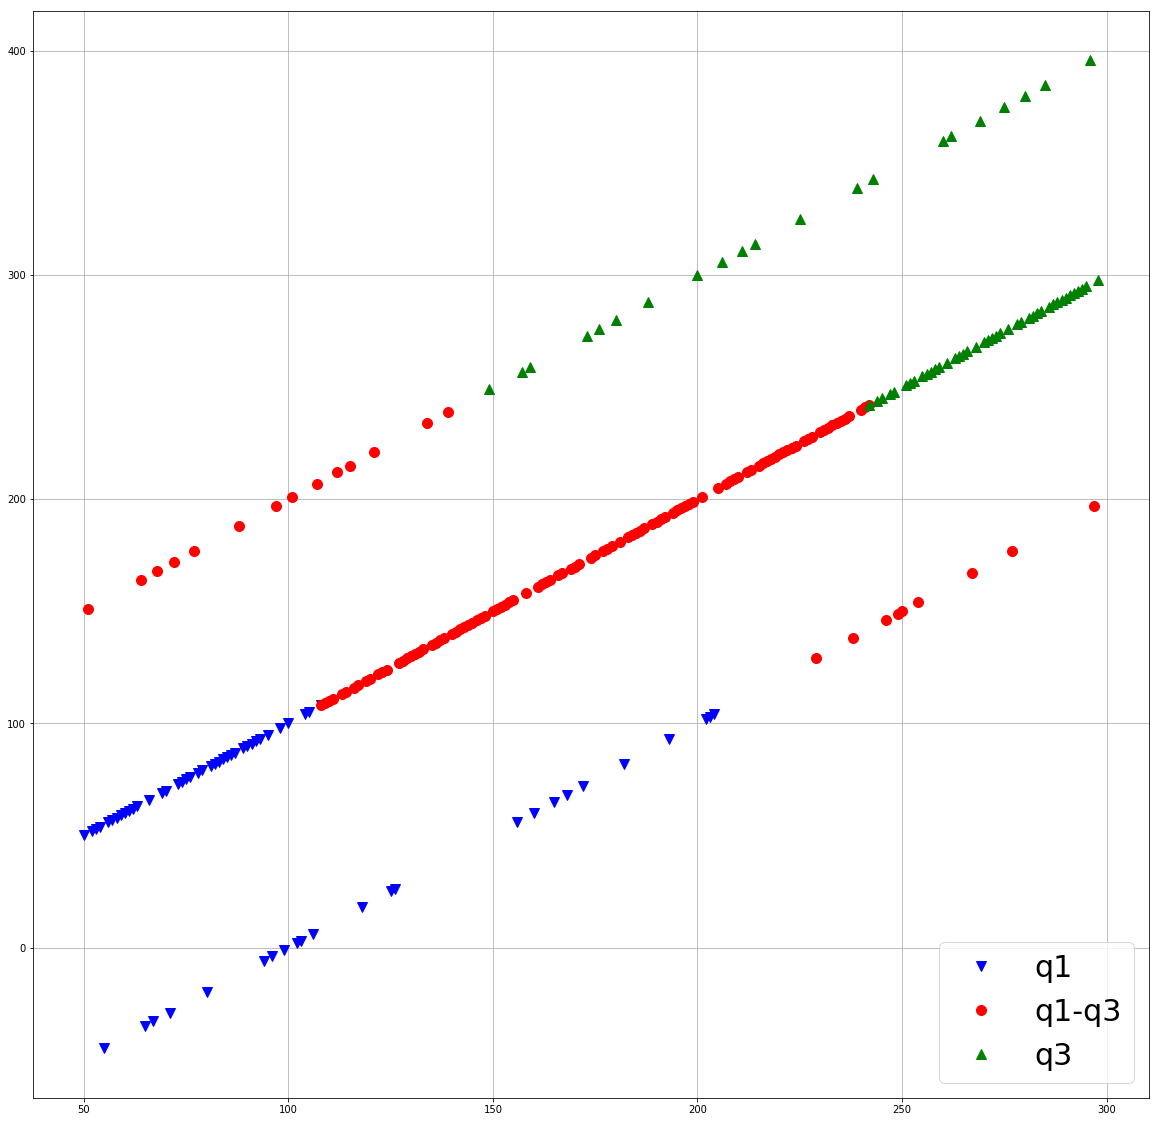

In [53]:
plt.figure(figsize=(20,20))
plt.plot(data_q1['x'], data_q1['y'], 'bv', markersize=10, label='q1')
plt.plot(data_q2['x'], data_q2['y'], 'ro', markersize=10, label='q1-q3')
plt.plot(data_q3['x'], data_q3['y'], 'g^', markersize=10, label='q3')
plt.legend(prop={'size':30}, loc=4)
plt.grid()

## Robust with quartiles: 0.25 and 0.75

In [56]:
rob = RobustScaler()
rob.fit(data)
data_rscaler = rob.transform(data)

## New data

In [60]:
data_rscaler = pd.DataFrame(data_rscaler)
data_rscaler.columns = data.columns
data_rscaler.head(10)

,x,y
0,-1.000000,-0.947761
1,-0.991935,-0.194030
2,-0.983871,-0.932836
3,-0.975806,-0.925373
4,-0.967742,-0.917910
5,-0.959677,-1.656716
6,-0.951613,-0.902985
7,-0.943548,-0.895522
8,-0.935484,-0.888060
9,-0.927419,-0.880597


## Describe

In [62]:
data_rscaler.describe()

,x,y
count,2.490000e+02,249.000000
mean,8.917454e-19,-0.016394
std,5.808411e-01,0.672100
min,-1.000000e+00,-1.656716
25%,-5.000000e-01,-0.514925
50%,0.000000e+00,0.000000
75%,5.000000e-01,0.485075
max,1.000000e+00,1.634328


## Plot

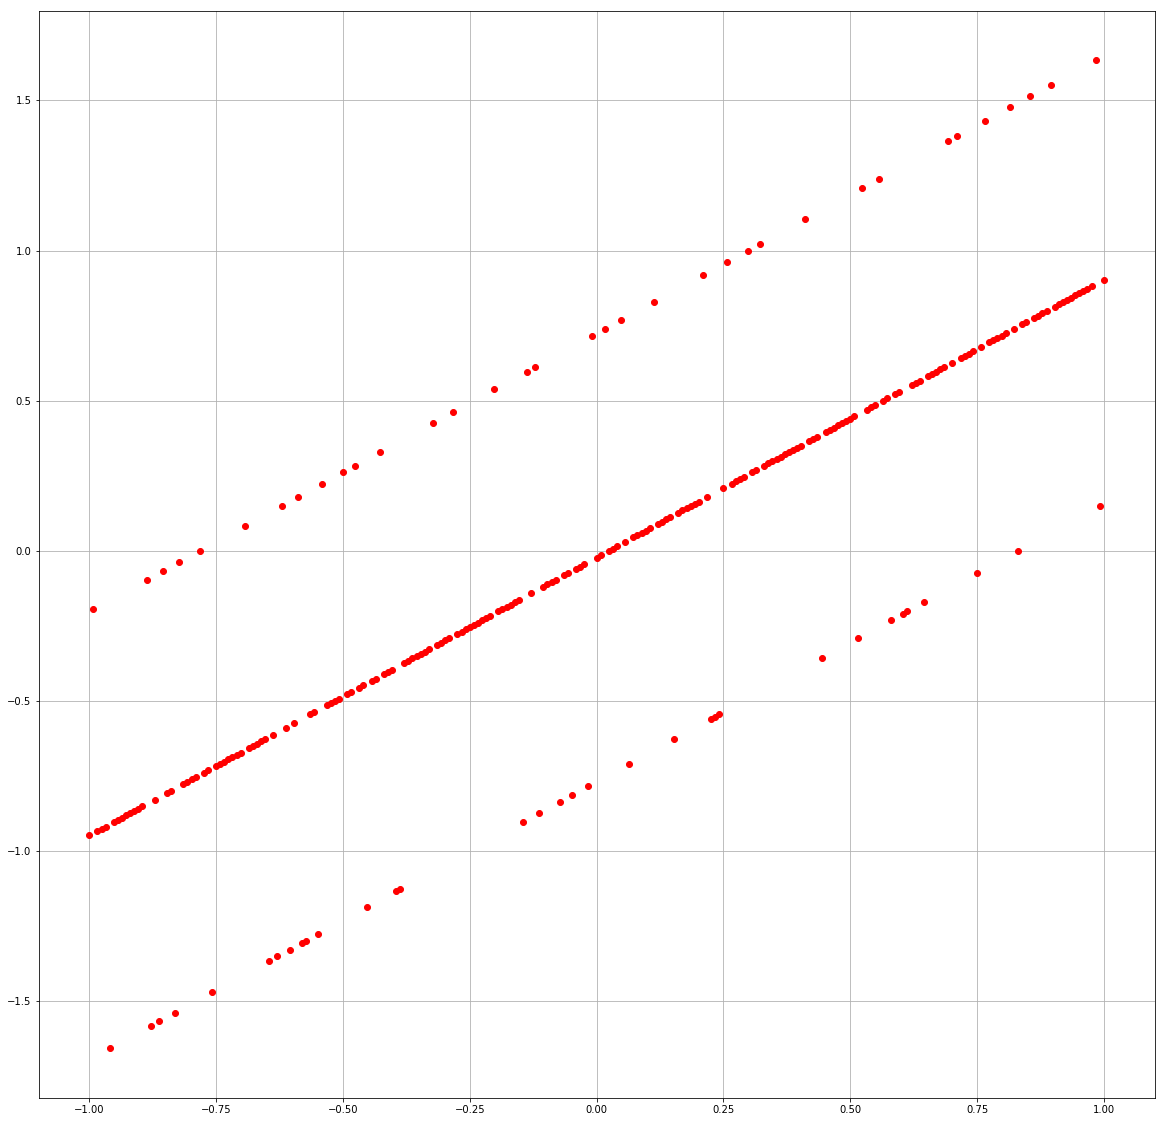

In [63]:
plt.figure(figsize=(20,20))
plt.plot(data_rscaler['x'], data_rscaler['y'], 'ro')
plt.grid()

## Plot with quartiles

In [64]:
data_q1_r = data_rscaler[data_rscaler['y'] <= data_rscaler.describe().loc['25%', 'y']]
data_q2_r = data_rscaler[(data_rscaler['y'] >= data_rscaler.describe().loc['25%', 'y']) & (data_rscaler['y'] <= data_rscaler.describe().loc['75%', 'y'])]
data_q3_r = data_rscaler[data_rscaler['y'] >= data_rscaler.describe().loc['75%', 'y']]

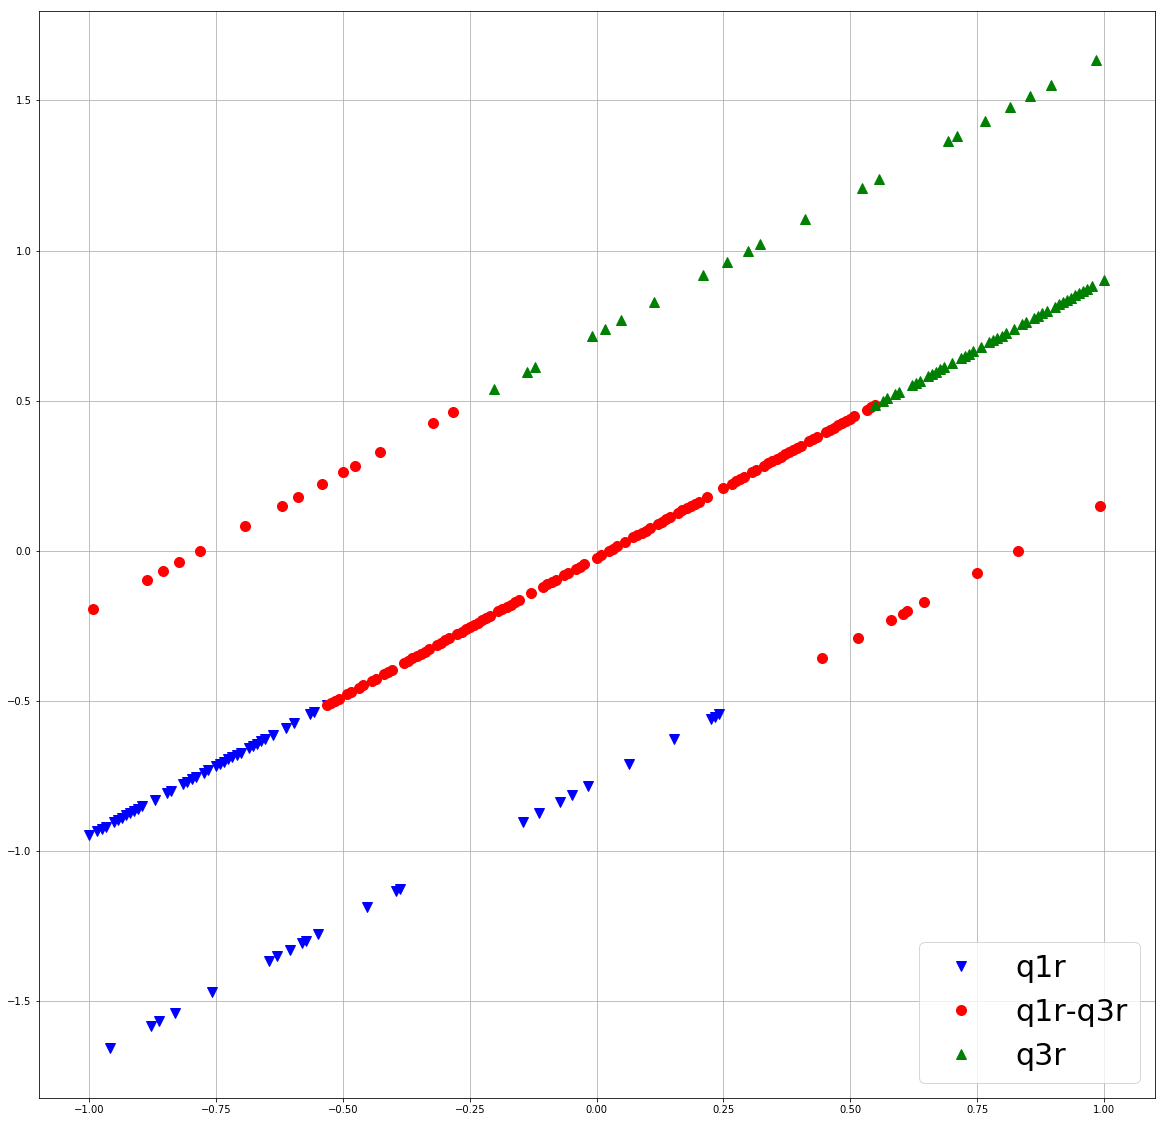

In [66]:
plt.figure(figsize=(20,20))
plt.plot(data_q1_r['x'], data_q1_r['y'], 'bv', markersize=10, label='q1r')
plt.plot(data_q2_r['x'], data_q2_r['y'], 'ro', markersize=10, label='q1r-q3r')
plt.plot(data_q3_r['x'], data_q3_r['y'], 'g^', markersize=10, label='q3r')
plt.legend(prop={'size':30}, loc=4)
plt.grid()

## RobustScaler with quartiles: 0. and 1. (without quartiles)

In [68]:
rob_woq = RobustScaler(quantile_range=(0.,1.))
rob_woq.fit(data)
data_rwoq = rob_woq.transform(data)

## New data

In [69]:
data_rwoq = pd.DataFrame(data_rwoq)
data_rwoq.columns = data.columns
data_rwoq.head(10)

,x,y
0,-50.000000,-9.123563
1,-49.596774,-1.867816
2,-49.193548,-8.979885
3,-48.790323,-8.908046
4,-48.387097,-8.836207
5,-47.983871,-15.948276
6,-47.580645,-8.692529
7,-47.177419,-8.620690
8,-46.774194,-8.548851
9,-46.370968,-8.477011


## Describe

In [70]:
data_rscaler.describe()

,x,y
count,2.490000e+02,249.000000
mean,8.917454e-19,-0.016394
std,5.808411e-01,0.672100
min,-1.000000e+00,-1.656716
25%,-5.000000e-01,-0.514925
50%,0.000000e+00,0.000000
75%,5.000000e-01,0.485075
max,1.000000e+00,1.634328


## Plot

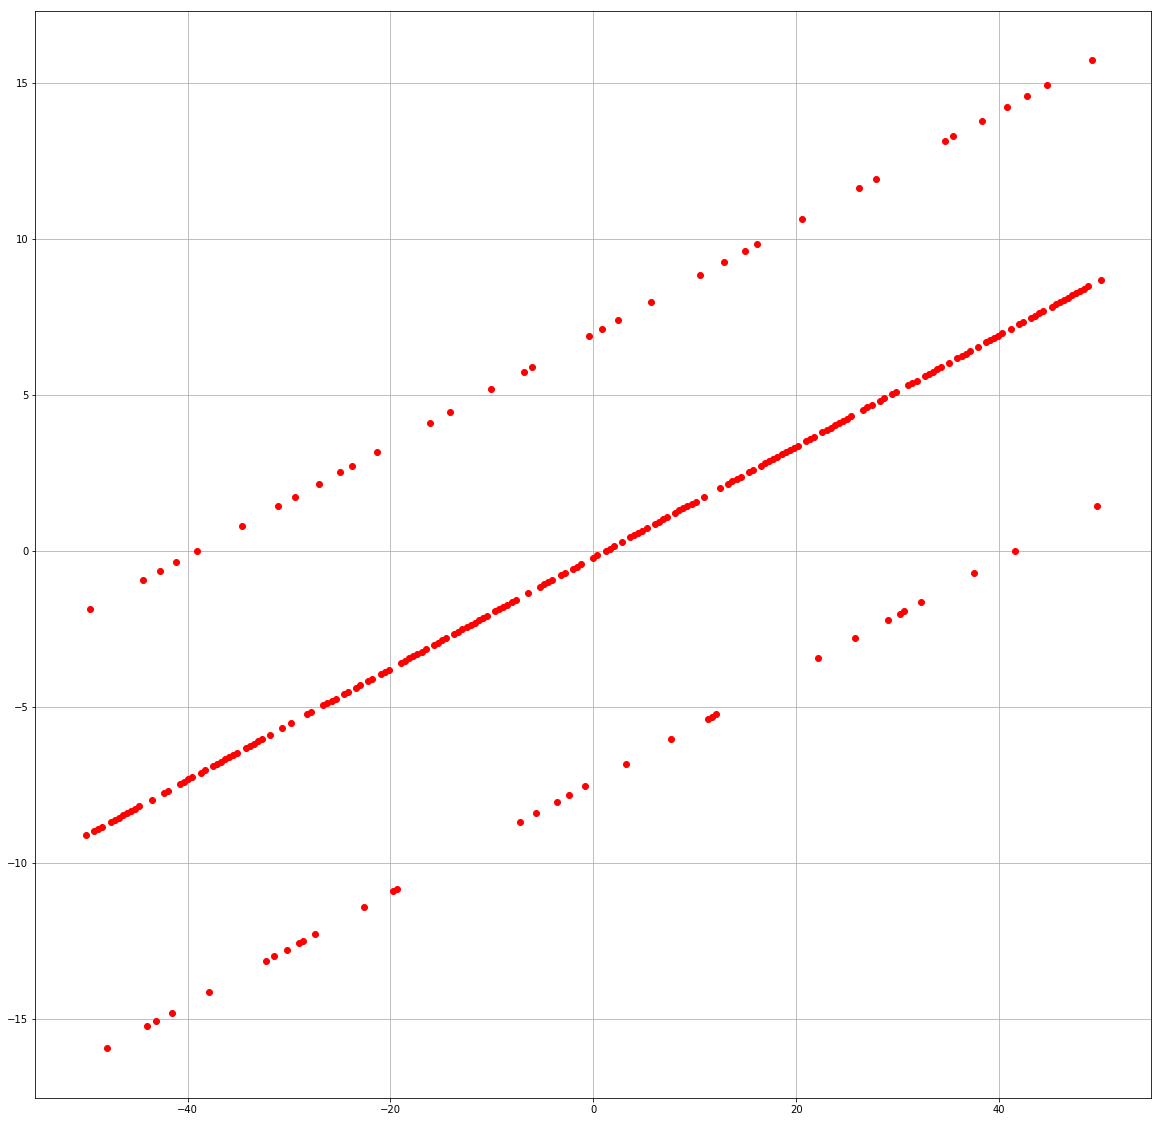

In [71]:
plt.figure(figsize=(20,20))
plt.plot(data_rwoq['x'], data_rwoq['y'], 'ro')
plt.grid()

## Plot with quartiles

In [73]:
data_q1_rwoq = data_rwoq[data_rwoq['y'] <= data_rwoq.describe().loc['25%', 'y']]
data_q2_rwoq = data_rwoq[(data_rwoq['y'] >= data_rwoq.describe().loc['25%', 'y']) & (data_rwoq['y'] <= data_rwoq.describe().loc['75%', 'y'])]
data_q3_rwoq = data_rwoq[data_rwoq['y'] >= data_rwoq.describe().loc['75%', 'y']]

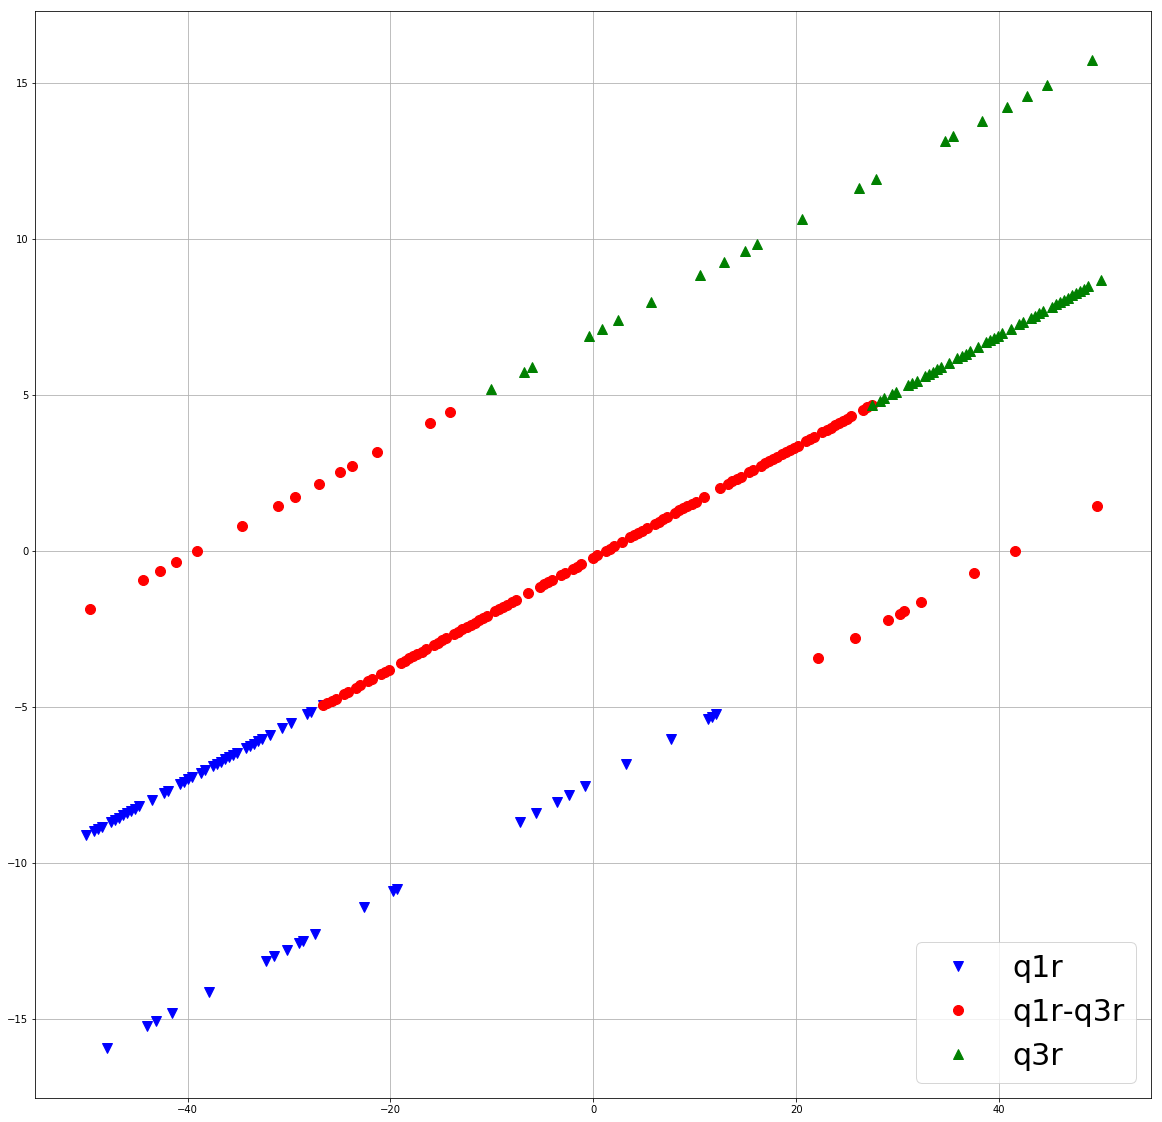

In [75]:
plt.figure(figsize=(20,20))
plt.plot(data_q1_rwoq['x'], data_q1_rwoq['y'], 'bv', markersize=10, label='q1r')
plt.plot(data_q2_rwoq['x'], data_q2_rwoq['y'], 'ro', markersize=10, label='q1r-q3r')
plt.plot(data_q3_rwoq['x'], data_q3_rwoq['y'], 'g^', markersize=10, label='q3r')
plt.legend(prop={'size':30}, loc=4)
plt.grid()

# Summary

1. RobustScaler is stable to emissions
2. With quantile_range=(0.,1.) he increases range of values

![gif](tenor.gif)